In [1]:
import pandas as pd
from collab.foraging.toolkit import (
    animate_predictors,
    dataObject,
    generate_local_windows,
    plot_predictor,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)
from collab.foraging.toolkit.point_contribution import _exponential_decay
from IPython.display import HTML

In [2]:
# load data
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled,
    frame_spacing=60,
)

# create a test foragers object with 20 frames
num_frames = 20
foragers_object = dataObject(
    fishDF_scaled_subsampled.loc[fishDF_scaled_subsampled["time"] < 20],
    grid_size=grid_size,
)

# get local windows
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs

local_windows = generate_local_windows(foragers_object)

foragers_object.local_windows = local_windows

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)


/home/rafal/s78projects/collab-creatures/collab/foraging/toolkit/utils.py:42: UserWarning: 
                NaN values in data. The default behavior of predictor/score generating functions is
                to ignore foragers with missing positional data. To modify, see documentation of
                `derive_predictors_and_scores` and `generate_local_windows`
                
  warnings.warn(


In [3]:
times = foragers_object.foragersDF["time"].unique()

rewards = []
for time in times:
    rewards.append(
        pd.DataFrame(
            {
                "x": [16, 13],
                "y": [13, 10],
            }
        )
    )

print(len(rewards))

print(rewards[0])

20
    x   y
0  16  13
1  13  10


In [4]:
from collab.foraging.toolkit.access import (
    _generate_access_predictor,
    generate_access_predictor,
)

ppr = _generate_access_predictor(
    foragers=foragers_object.foragers,
    predictor_name="pred",
    local_windows=local_windows,
    decay_contribution_function=_exponential_decay,
    decay_factor=0.2,
)

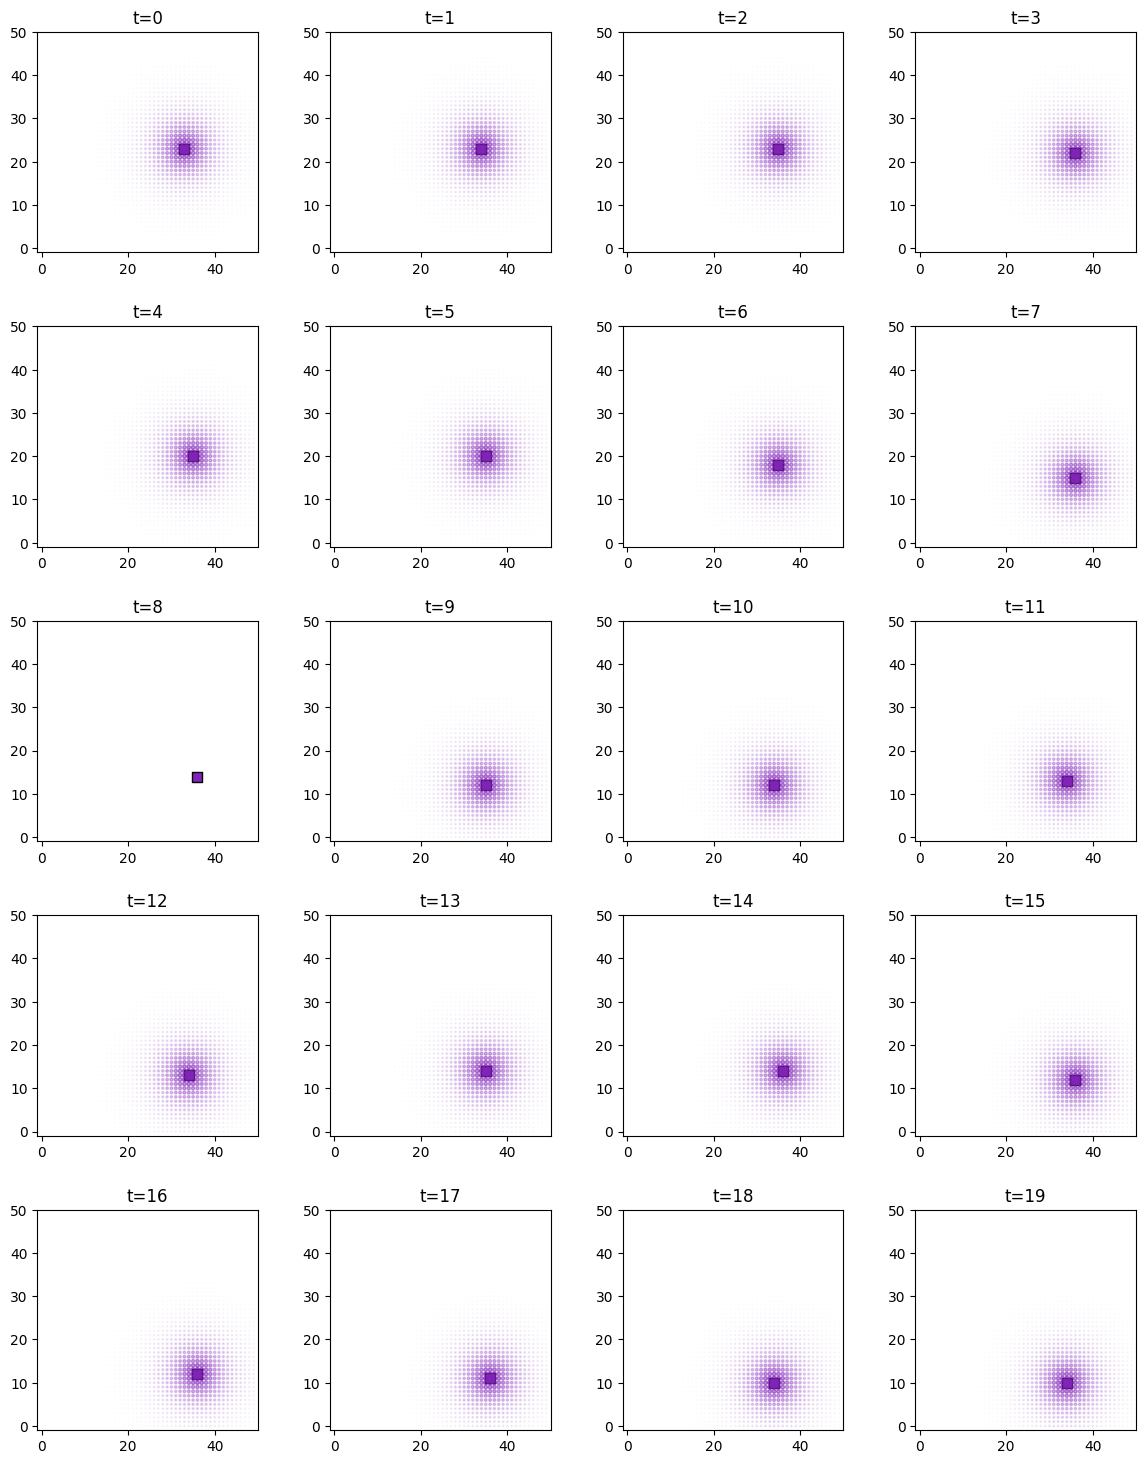

In [5]:
plot_predictor(
    foragers_object.foragers,
    ppr,
    "pred",
    forager_position_indices=[1],
    forager_predictor_indices=[1],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)

2024-09-19 10:00:27,744 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


20


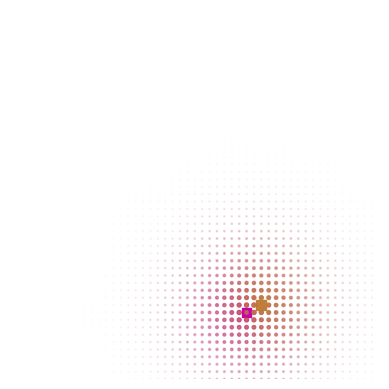

In [9]:
foragers_object.predictor_kwargs = {
    "access": {
        "decay_contribution_function": _exponential_decay,
        "decay_factor": 0.2,
    }
}

access = generate_access_predictor(foragers_object, predictor_name="access")

ani = animate_predictors(
    foragers_object.foragersDF,
    access,
    predictor_name="access",
    forager_position_indices=[0, 1],
    forager_predictor_indices=[0, 1],
    grid_size=grid_size,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())